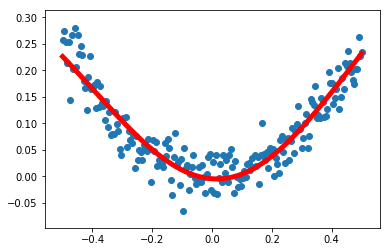

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Get random samples
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis] # row = 200
noise = np.random.normal(0, 0.03, x_data.shape)
# print(x_data)
y_data = np.square(x_data) + noise

# In this case None --> 200
x = tf.placeholder(tf.float32,[None, 1])
y = tf.placeholder(tf.float32,[None, 1])

# Hidden layer
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

# Output layer
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# loss function
loss = tf.reduce_mean(tf.square(y-prediction))

# object
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(2000):
        sess.run(train_step, feed_dict={x:x_data, y:y_data})
    
    # Get prediction 
    prediction_value = sess.run(prediction,feed_dict={x:x_data})

    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value,'r-', lw=5)
    plt.show()
